In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from matplotlib.widgets import Slider

In [92]:
df = pd.read_csv("../dataset/IT_vacancies.csv")
df.head()

id  area_id        area_name  \
0  85146733        2  Санкт-Петербург   
1  87391606        1           Москва   
2  85896506       79          Саратов   
3  86876446       72            Пермь   
4  84560508       76   Ростов-на-Дону   

                                                name test_required  salary_to  \
0  Тестировщик / QA Engineer (Junior / Middle / S...           NaN        NaN   
1        Ведущий Системный Аналитик Kleiber.Graphics           NaN   250000.0   
2                                    Бизнес-аналитик           NaN        NaN   
3  Менеджер проектов/Аккаунт-менеджер (IT сфера) ...           NaN        NaN   
4  Специалист службы поддержки (удаленно), Ростов...           NaN        NaN   

   salary_from salary_gross salary_currency  address_lat  ...  \
0          NaN          NaN             NaN    59.984924  ...   
1     230000.0        False             RUR          NaN  ...   
2          NaN          NaN             NaN          NaN  ...   
3          NaN          NaN             NaN    58.004460  ...   
4      35000.0         True             RUR          NaN  ...   

   accept_temporary accept_handicapped professional_roles_id  \
0             False               True                   124   
1             False              False                   148   
2             False              False                    10   
3             False              False                   107   
4             False              False                   121   

            professional_roles_name working_time_modes driver_license_types  \
0                       Тестировщик                NaN                  NaN   
1                Системный аналитик                NaN                  NaN   
2                          Аналитик                NaN                  NaN   
3             Руководитель проектов                NaN                  NaN   
4  Специалист технической поддержки                NaN                  NaN   

   working_time_intervals  quick_responses_allowed response_letter_required  \
0                     NaN                    False                    False   
1                     NaN                    False                    False   
2                     NaN                    False                    False   
3                     NaN                    False                    False   
4                     NaN                    False                    False   

  accept_incomplete_resumes  
0                     False  
1                     False  
2                     False  
3                     False  
4                     False  

[5 rows x 54 columns]

### 2. Привести описание датасета.

**Описание**:
Датасет содержит информацию о вакансиях в IT-сфере, собранную с сайта HeadHunter за период с 18 сентября по 17 октября 2023 года.

| Признак         | Описание                                       | Единицы       |
|------------------|------------------------------------------------|----------------|
| area             | Регион, где размещена вакансия                 | строка         |
| salary_from      | Нижняя граница зарплаты                        | рубли          |
| salary_to        | Верхняя граница зарплаты                       | рубли          |
| salary_currency  | Валюта                                         | строка         |
| published_at     | Дата публикации                                | дата/время     |
| experience       | Требуемый опыт                                 | строка         |
| employment       | Тип занятости                                  | строка         |
| schedule         | График работы                                  | строка         |
| key_skills       | Навыки                                         | строка         |

## 3. matplotlib

   - Построить несколько графиков разного вида с использованием `matplotlib`.
   - Построить несколько суб-графиков на одном графике используя `.subplot`.
   - Построить интерактивный график со слайдером.

   > - Графики должны быть разных видов.
   > - Хотя бы в одном графике необходимо подписать оси.
   > - Во всех графиках необходимо указать название.
   > - Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

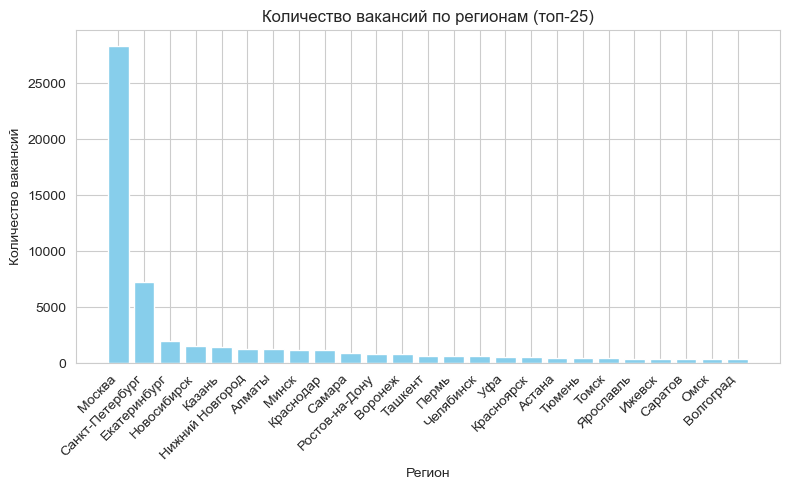

In [93]:
region_counts = df['area_name'].value_counts().head(25)
plt.figure(figsize=(8, 5))
plt.bar(region_counts.index, region_counts.values, color='skyblue')
plt.title('Количество вакансий по регионам (топ-25)')
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.grid(True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

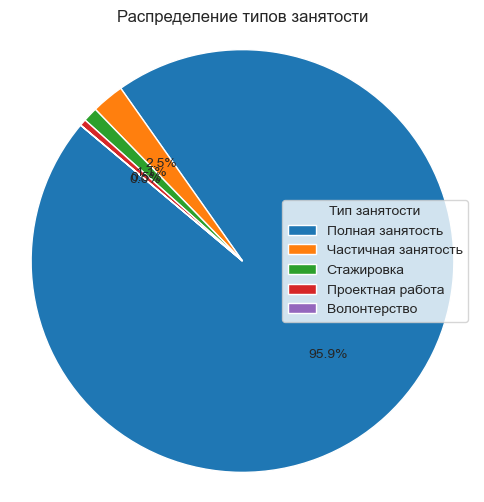

In [94]:
employment_counts = df['employment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(employment_counts.values, autopct='%1.1f%%', startangle=140)
plt.title('Распределение типов занятости')
plt.axis('equal')
plt.legend(employment_counts.index, title='Тип занятости', loc='best')
plt.show()

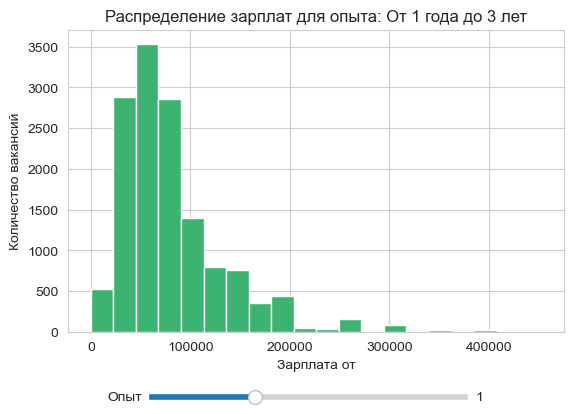

In [95]:
MAX_SALARY = 500_000
exp_levels = df['experience'].unique()
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

initial_level = exp_levels[0]
data_exp = df[
    (df['experience'] == initial_level) &
    (df['salary_from'].notna()) &
    (df['salary_from'] > 0) &
    (df['salary_from'] < MAX_SALARY)
]
hist = ax.hist(data_exp['salary_from'], bins=20, color='mediumseagreen')
ax.set_title(f'Распределение зарплат для опыта: {initial_level}')
ax.set_xlabel('Зарплата от')
ax.set_ylabel('Количество вакансий')

ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider = Slider(ax_slider, 'Опыт', 0, len(exp_levels) - 1, valinit=1, valstep=1)

def update(val):
    ax.clear()
    level = exp_levels[int(val)]
    data_exp = df[
        (df['experience'] == level) &
        (df['salary_from'].notna()) &
        (df['salary_from'] > 0) &
        (df['salary_from'] < MAX_SALARY)
    ]
    ax.hist(data_exp['salary_from'], bins=20, color='mediumseagreen')
    ax.set_title(f'Распределение зарплат для опыта: {level}')
    ax.set_xlabel('Зарплата от')
    ax.set_ylabel('Количество вакансий')
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

## 4. pandas

Среди графиков должен присутствовать один `boxplot` (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).

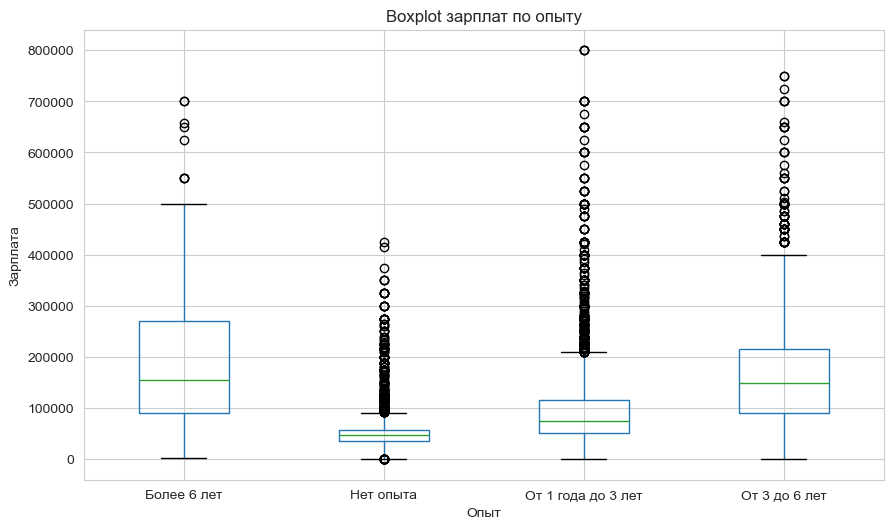

In [96]:
df_copy = df.copy()[(df['salary_from'] < 1_000_000) & (df['salary_to'] < 1_000_000)]

df_copy['avg_salary'] = (df_copy['salary_from'] + df_copy['salary_to']) / 2

df_copy.boxplot(column='avg_salary', by='experience', figsize=(10, 6))
plt.title('Boxplot зарплат по опыту')
plt.suptitle('')
plt.xlabel('Опыт')
plt.ylabel('Зарплата')
plt.show()

Series.plot

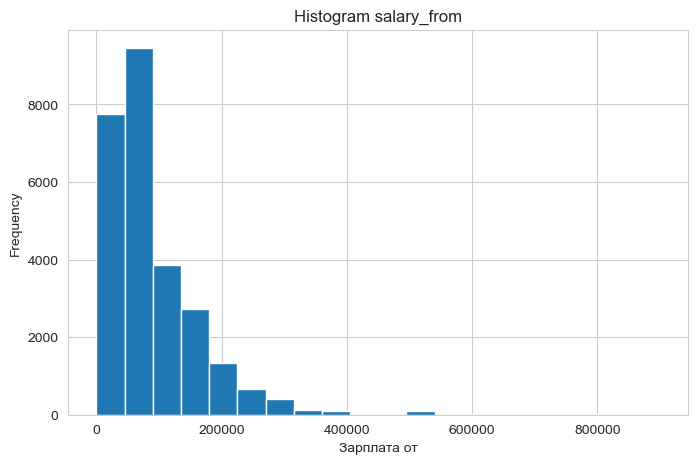

In [97]:
df.copy()[df['salary_from'] < 1_000_000]['salary_from'].dropna().plot(
    kind='hist', bins=20, title='Histogram salary_from', figsize=(8, 5)
)
plt.xlabel('Зарплата от')
plt.show()

DataFrame.plot

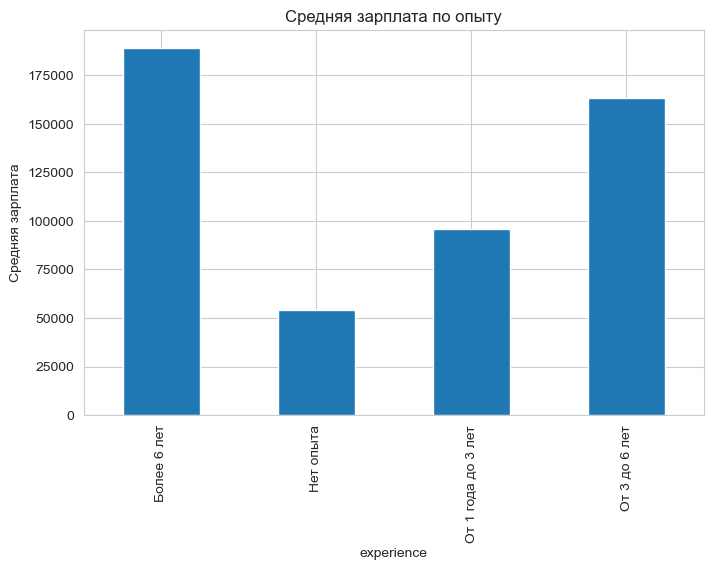

In [98]:
df_copy.groupby('experience')['avg_salary'].mean().plot(kind='bar', title='Средняя зарплата по опыту', figsize=(8, 5))
plt.ylabel('Средняя зарплата')
plt.show()

## 5. seaborn

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

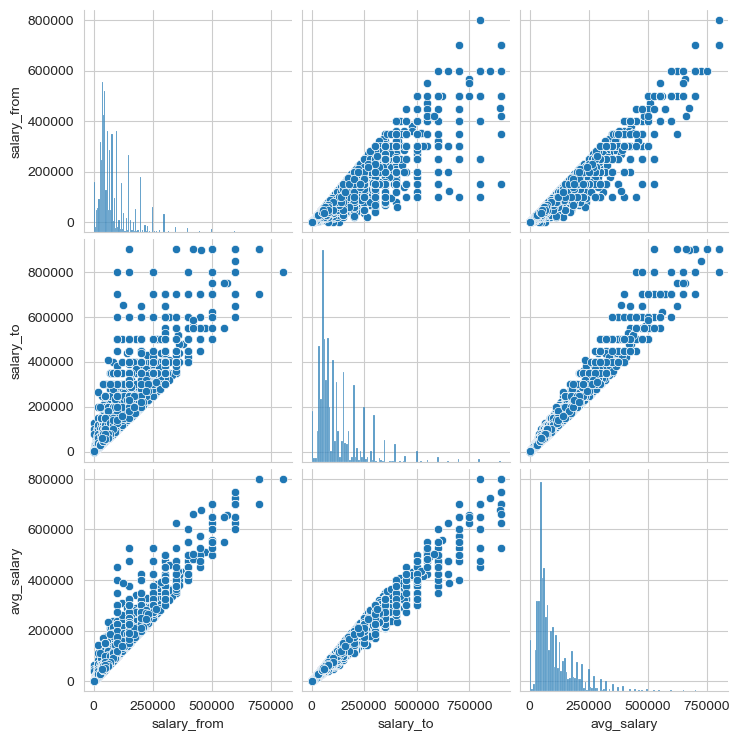

In [99]:
sns.pairplot(df_copy[['salary_from', 'salary_to', 'avg_salary']])
plt.show()

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

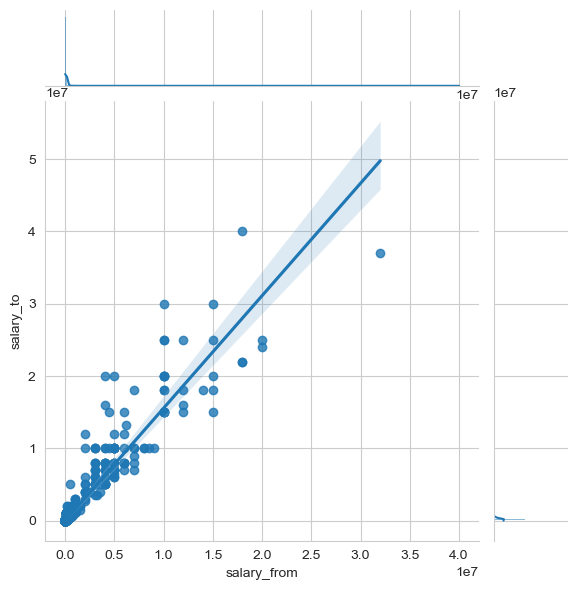

In [100]:
sns.jointplot(x='salary_from', y='salary_to', data=df, kind='reg')
plt.show()

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

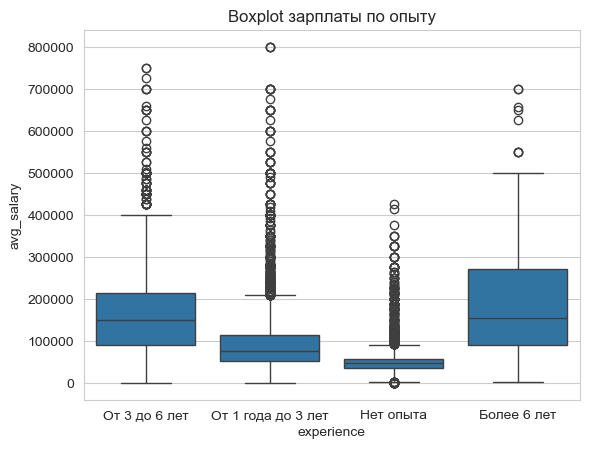

In [101]:
df_copy = df_copy.copy()[df_copy['avg_salary'] < 1_000_000]

sns.boxplot(data=df_copy, x='experience', y='avg_salary')
plt.title('Boxplot зарплаты по опыту')
plt.show()

Построить график `.heatmap` попарной корреляции всех числовых признаков.

     > Категориальные признаки необходимо убрать из датафрейма перед построением.

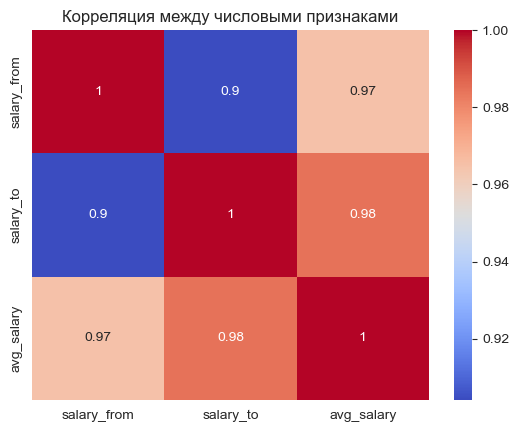

In [102]:
corr = df_copy[['salary_from', 'salary_to', 'avg_salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между числовыми признаками')
plt.show()

## 6. scipy.stats

Построить QQ-график для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

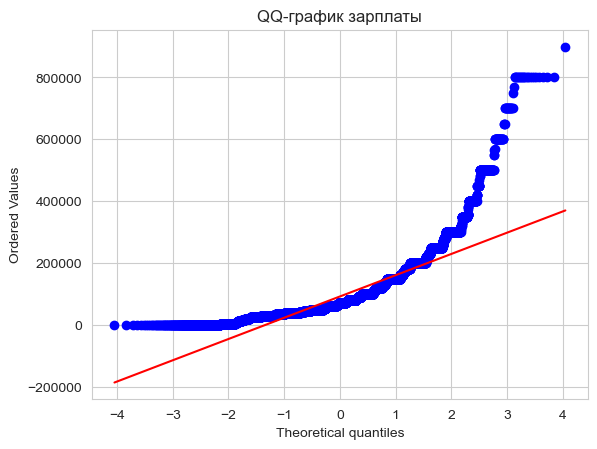

In [103]:
df_copy = df.copy()[df['salary_from'] < 1_000_000]['salary_from'].dropna()
salary = df_copy
stats.probplot(salary, dist="norm", plot=plt)
plt.title('QQ-график зарплаты')
plt.show()

Построить гистограмму для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

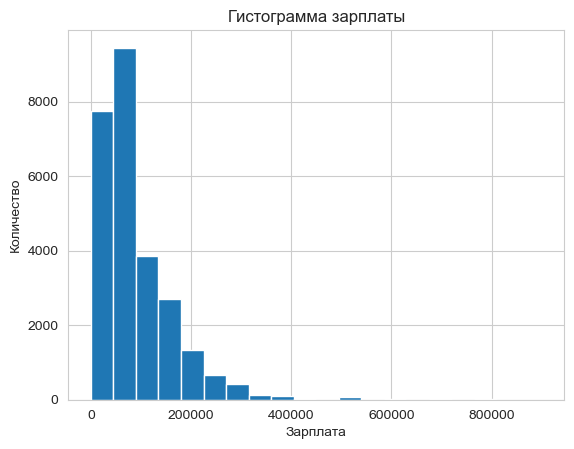

In [104]:
plt.hist(salary, bins=20)
plt.title('Гистограмма зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

## 7. plotly

In [105]:

fig = px.scatter(df, x='salary_from', y='salary_to', color='experience', title='Зарплата от и до')
fig.show()

In [106]:
df_copy = df
df_copy = df_copy[(df_copy['salary_from'] < 1_000_000) & (df_copy['salary_to'] < 1_000_000)].copy()
fig = make_subplots(rows=1, cols=2, subplot_titles=("зарплата от", "зарплата до"))
fig.add_trace(go.Box(y=df_copy['salary_from'], name='От'), row=1, col=1)
fig.add_trace(go.Box(y=df_copy['salary_to'], name='До'), row=1, col=2)
fig.update_layout(title_text="Box-графики зарплат")
fig.show()

In [107]:
df['avg_salary'] = (df['salary_from'] + df['salary_to']) / 2

fig = px.bar(df.groupby('area_name')['avg_salary'].mean().reset_index(),
             x='area_name', y='avg_salary', title='Средняя зарплата по регионам',
             hover_data=['avg_salary'])
fig.show()